In [267]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

# **About the Data** 
##### Sourced from Meta, formerly Facebook, this data was collected with aims to quantify connections to individuals of high socioeconomic standing. This, in turn,  impacts their own ability to move out of poverty, have connections at better companies and jobs, and improve their overall socioeconomic standing. Both datasets I have chosen have similar metrics. The reason I needed both was to hone in on specific regions and/or states that the college data set didn't have, but the county level data possessed. 
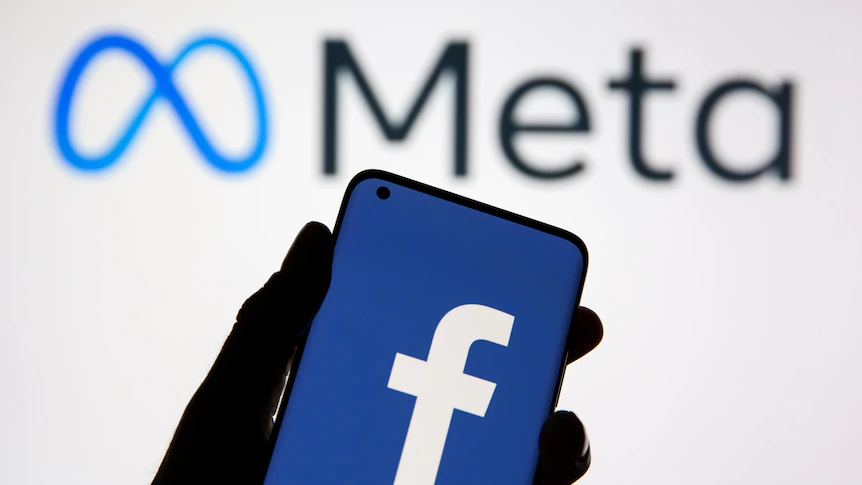

In [268]:
# Load US college data
us_college_data = pd.read_csv("social_capital_college.csv")
county_data = pd.read_csv("social_capital_county.csv")

# **Question 1a:**
##### Merge the two data frames using the pandas `merge` method.

In [269]:
# Merge datasets
merged = us_college_data.merge(county_data, on="county")

# **Question 1b:**
##### Quesry the newly merged data frame to only include colleges located in California and insert it into a new data frame, called `california_colleges` 

In [270]:
# Create new df that only contains colleges in California
california_colleges = merged.query('county_name.str.contains("California")', engine='python')

# **Question 1c:**
##### If you noticed, identifying what type the school is can be difficult, as there are a lot of entries in the data frame. Complete the method below that creates a new column in the `california_colleges` data frame, called `college_type`, and inserts whether it is a UC, CSU, or CCC.

In [271]:
def college_type(data):
    if "University of California-" in data:
        return "UC"
    elif "California State University-" in data:
        return "CSU"
    elif "Community College" in data:
        return "CCC"
    return "Other"
    
california_colleges['college_type'] = california_colleges['college_name'].apply(college_type)

# **Clustering**
##### We will now dive into clustering methods! Unlike most ML techniques you are familiar with, such as regression and classification techniques such as decision trees, clustering is `unsupervised` ML protocol. This means that the algorithm, when deployed, will sort each new input into a cluster, even without it being placed into one. `K-means clustering` is the most popular and most utilized. For those of you familiar with runtime complexities of algorithms, K-means clustering has a linear, or O(n), runtime (there are some disagreements as to how true that is in certain cases, but it is mostly linear). To explain more simply, as the data set grows and more entries are inputted, the amount of time it takes for the algo to run increases in a linear fashion. Here is a quintessential, but really great graph to help visualize runtime complexities:
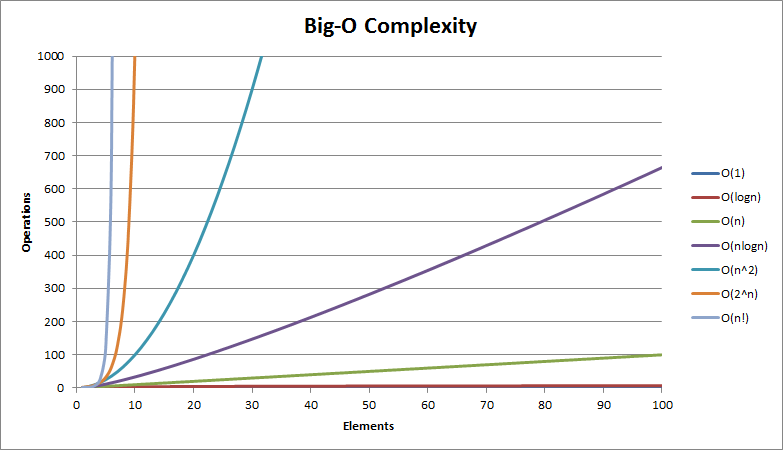

##### So how do we choose centers, or "cluster sites", as I like to call them? Here are the main steps:
1. "Randomly" choose K number of centers, or cluster sites
    -  I put randomly in quotes because there is a method, called the elbow method, that can provide a much closer value for k than an arbitrary number, but we won't worry about that for now.
2. Make each cluster site a different color
3. Points closest to a certain cluster site should be the same color.
    - We'll see how to do this more mathematically later>

# **Question 2a:**
##### Using Seaborn, create a simple scatterplot that plots the three types of California Colleges we are interested in.

<AxesSubplot:xlabel='ec_high_own_ses_college', ylabel='exposure_own_ses_college'>

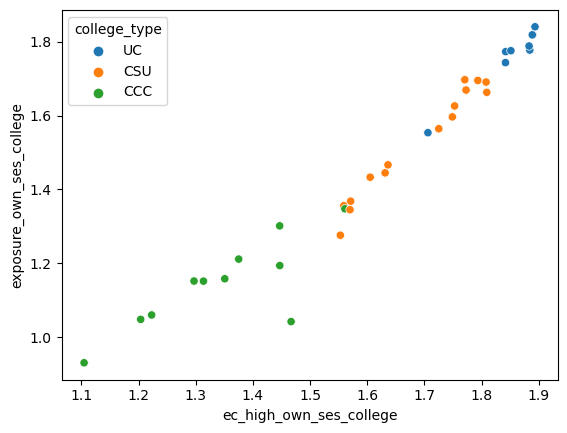

In [272]:
sns.scatterplot(data=california_colleges.query("college_type != 'Other'"),
                x='ec_high_own_ses_college',
                y='exposure_own_ses_college',
                hue='college_type')

##### As you can already see, there are groupings forming; however, you can also notice that some points are encroaching on areas that they may not belong to.

# **Question 2b:**
##### We stated before that clustering is an unsupervised ML method, which means that the data passed into it must be unlabeled. In this case, the labeling of the name of the `college` and what `college_type` are NOT to be used in the actual model. I simply used this to show a graph to give a basic understanding of the data. Now, you must create a new data frame, `without_labels`, that has the same columns as the `california_colleges` df, except without the `college` and `college_type` columns. 
- Hint: you'll also want to drop columns that contain no data.

In [273]:
without_labels = california_colleges.drop(["college_type", "college_name"], axis=1).dropna()
without_labels

,college,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,ec_high_own_ses_se_college,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
100,111100,93454,6083,1220.000000,1.13665,0.02534,1.00510,0.03605,1.42613,0.01834,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
101,128500,93109,6083,1827.000000,1.44700,0.02539,1.15655,0.03681,1.71152,0.01624,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
102,132000,93106,6083,3450.333333,1.80382,0.01471,1.39456,0.02122,1.88924,0.00731,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
103,134100,93108,6083,296.666667,1.87857,0.02474,1.68845,0.03651,1.91260,0.01427,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
104,111300,93536,6037,1904.666667,1.01572,0.02544,0.94726,0.03566,1.25940,0.02195,...,0.77687,1.18295,0.18278,-0.10729,0.03180,-0.07152,0.08176,0.94514,0.04692,0.01358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,770700,95370,6109,2879.000000,1.17845,0.03767,1.03037,0.04482,1.39600,0.03057,...,1.02465,1.04610,0.09627,-0.15476,0.01058,-0.05500,0.10637,0.99376,0.13939,0.02723
2421,859700,95971,6063,179.000000,1.18067,0.05434,0.98592,0.07347,1.29708,0.04620,...,0.89622,0.93349,0.05257,-0.14202,0.03570,0.00114,0.11529,0.99445,0.11806,0.04108
2473,1167200,95482,6045,482.000000,0.79295,0.03326,0.81153,0.04522,1.02083,0.03246,...,0.80641,0.85565,0.12383,-0.20260,0.06936,-0.09029,0.11799,0.99517,0.09610,0.02589
2487,1290700,96150,6017,340.666667,1.08800,0.05043,0.94908,0.07587,1.31360,0.04552,...,1.22497,1.35524,0.09022,-0.13382,0.02185,-0.04780,0.08770,0.96995,0.10019,0.01701


##### The code below may be a bit advanced for this class (especially if you have not taken 61a), so I'll attempt to explain it simply. 
- The Center class initializes each data point passed in with it's own coordinates based on the `num_dimensions`, or the number of columns in the data frame, finding the min and max. WE then want to randomize these values so that the cluster sites are different for each iteration that we run. This matters in the future when we get into punitive measures to create an accurate model that focuses
- There are 3 other methods, but the main one is the `dist` function. This 

In [297]:
class Center():
    def __init__(self, data):
        """generates a random center inside the region bounded by the data"""        
        num_dimensions = data.shape[1]
        self.coordinates = np.array([0.0] * num_dimensions)
        for i in range(num_dimensions):
            min_value = np.min(data[:, i])
            max_value = np.max(data[:, i])            
            random_value = random.uniform(min_value, max_value)            
            self.coordinates[i] = random_value
    
    def __str__(self):
        return str(self.coordinates)

    def __repr__(self):
        return repr(self.coordinates)

    def dist(self, data_point):
        return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))

In [304]:
# Initializes 3 different centers using the same data
c1 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c2 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c3 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)

In [305]:
def plot_centers_and_black_data(without_labels, centers):
    """plots all of the included data as well as the cluster centers we created above."""
    sns.scatterplot(data=without_labels, x="ec_high_own_ses_college", y="exposure_own_ses_college",
                    color="black")
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)    
    plt.xlabel('ec_high_own_ses_college')
    plt.ylabel('exposure_own_ses_college')
    legend_text = ['cluster' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.insert(0, 'data')
    plt.legend(legend_text)

# **Question 2c:**
##### Most of the heavy lifting and more complex code has been done for you. Now, call the above function using the parameters we created to plot what the data and the clusters look like!

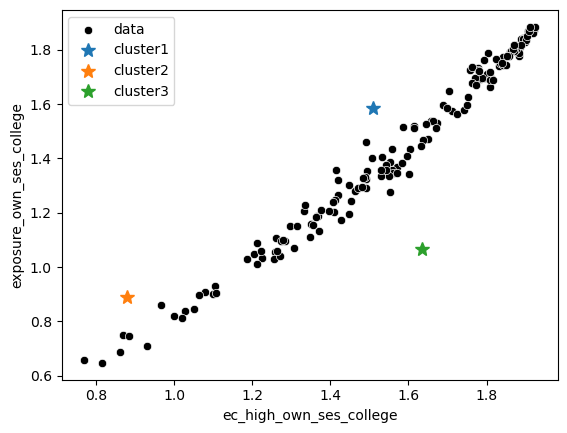

In [306]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [307]:
def get_cluster_number(dists):
    """identifies how many clusters are created"""
    return np.where(dists == np.min(dists))[0][0]

In [308]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis=1)
without_labels["cluster"].value_counts()

0    103
2     34
1     22
Name: cluster, dtype: int64

##### If, after running the above cell, you do not get 3 different clusters, rerun all cells starting from the one under the Center class.

In [309]:
def plot_centers_and_colorized_data(without_labels, centers):
    """Plots each data point that is colorized based on the cluster site
    it was randomly assigned."""
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data=without_labels, x="ec_high_own_ses_college", y="exposure_own_ses_college",
                    hue="cluster",
                    palette=current_palette)  
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)
    plt.xlabel('ec_high_own_ses_college')
    plt.ylabel('exposure_own_ses_college')
    legend_text = ['cluster' + str(i) for i in range(1, len(centers) + 1)]
    plt.legend(legend_text)

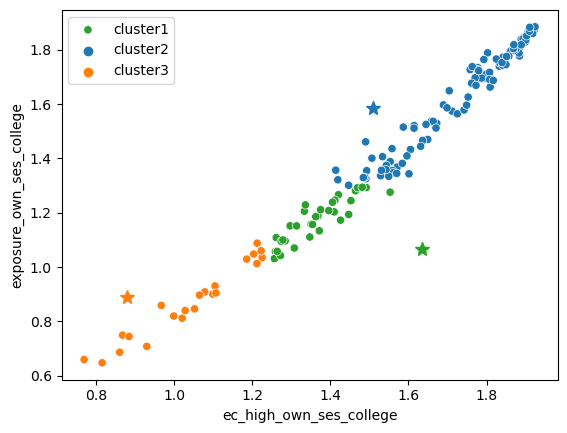

In [310]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [287]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

# **Mathematically Punitive**
##### The above `length` and `width` values are found by grouping all data points who are part of the same cluster we assigned earlier and taking their average value. We then assign the newly found averages to the coordinates of the 3 different clusters. For those of you interested in the most fun part, here is the formula expressed mathematically:
$$\large \frac{1}{n} \sum_{i=1}^{n}x_{i}$$
##### If you didn't notice, this is simply just the mean formula; however, seeing things expressed this way will serve you well in other classes down the line, such as Data 140, Data 100, etc.

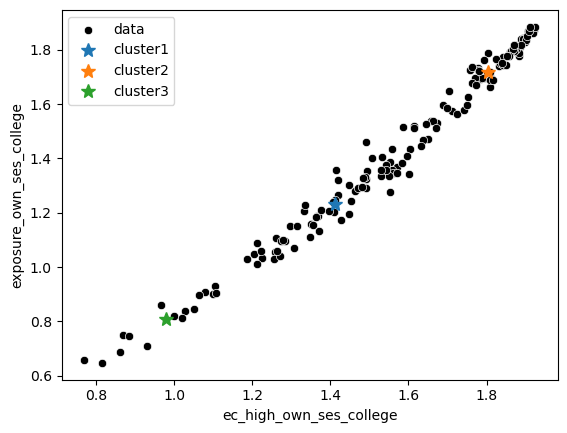

In [290]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [291]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

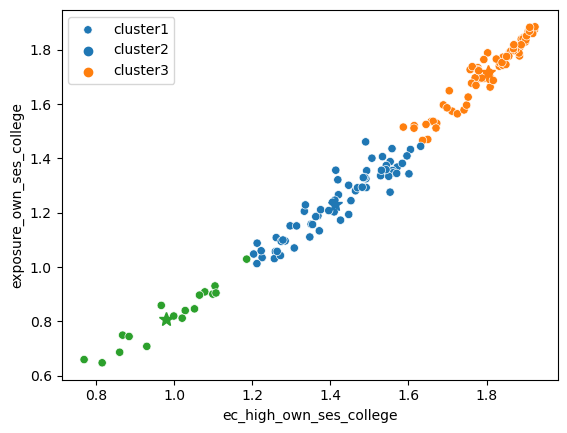

In [292]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [293]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

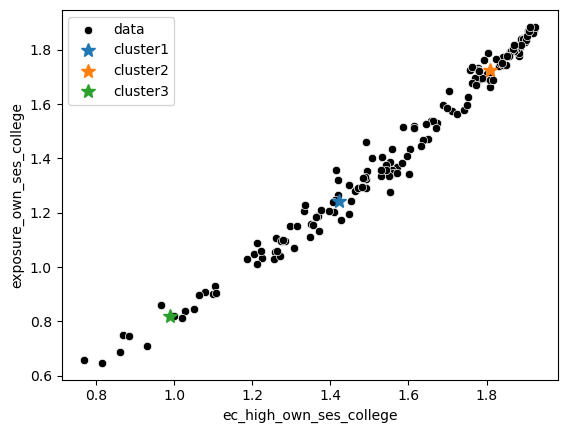

In [294]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [295]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

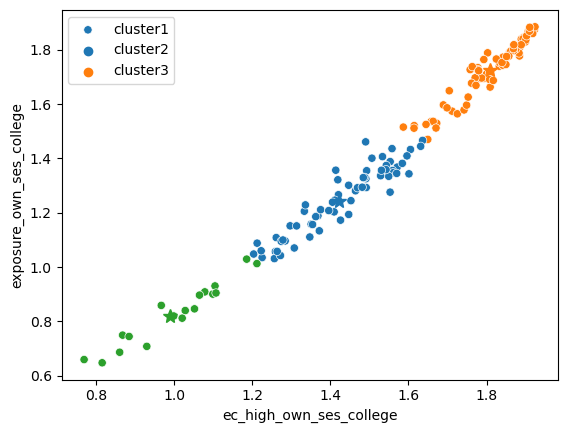

In [296]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

##### Comparing this final graph to the previous colorized one, the clusters contain the same data, meaning that our punishment system has been optimized. Running it more than what we have now will only produce the same exact output. This is what we want!